<a href="https://colab.research.google.com/github/JoaquinJustelP/Python_UB_2024/blob/main/kmeans_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means example

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np


In [ ]:
from sklearn.datasets import load_iris

In [ ]:
data = load_iris()
X = data.data
y = data.target

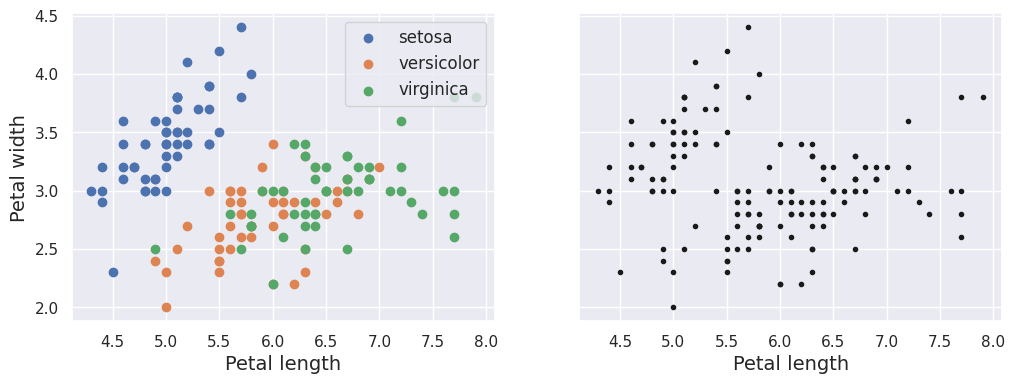

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(121)

for i, sp in enumerate(data.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], label=sp)

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

In [ ]:
from sklearn.cluster import KMeans

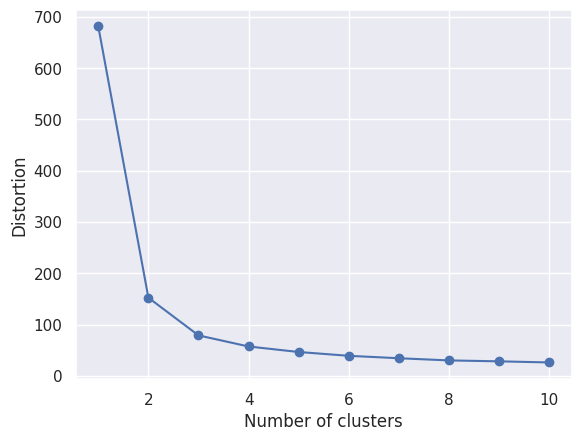

In [ ]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
km = KMeans(n_clusters=3, random_state=2)
y_pred = km.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


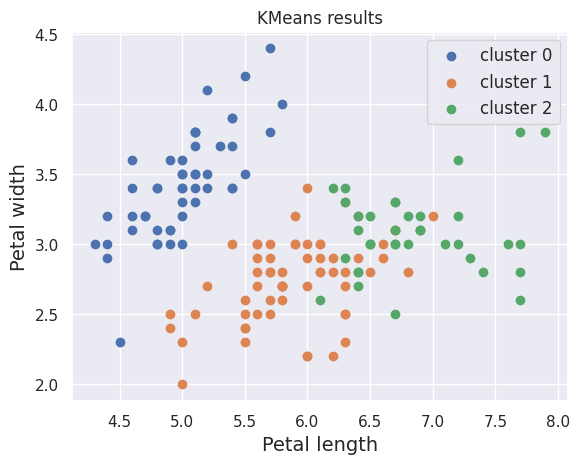

In [ ]:
ax = plt.subplot(111)

for i in np.unique(y_pred):
    ax.scatter(X[y_pred==i, 0], X[y_pred==i, 1], label=f'cluster {i}')

plt.title('KMeans results')
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()

Comparing the cluster results to the original labels.

In [ ]:
np.sum(y_pred==y)

134

In [ ]:
np.sum(y_pred==y) / len(y)

0.8933333333333333

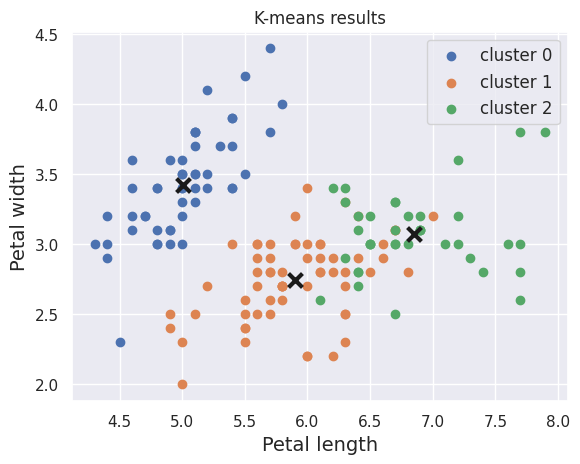

In [ ]:
ax = plt.subplot(111)

for i in np.unique(y_pred):
    ax.scatter(X[y_pred==i, 0], X[y_pred==i, 1], label=f'cluster {i}')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s=100,marker='x', c='k', linewidths=3)

plt.title('K-means results')
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper right", fontsize=12)

plt.show()

## Reduce dimensions with PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X)

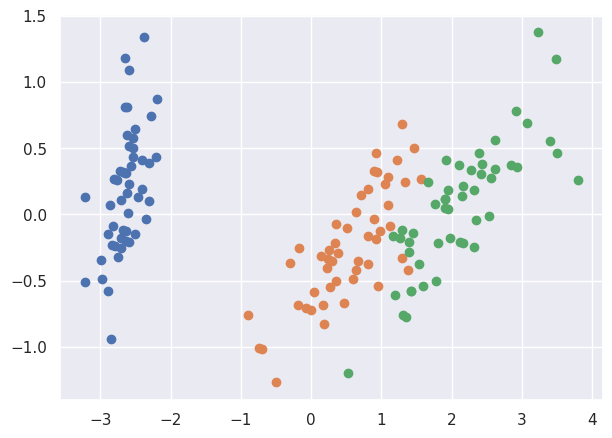

In [ ]:
plt.figure(figsize=(7, 5))

for i, sp in enumerate(data.target_names):
    plt.scatter(x_pca[y==i, 0], x_pca[y==i, 1])

In [ ]:
km = KMeans(n_clusters=3, random_state=2)
y_pred = km.fit_predict(x_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
np.sum(y_pred==y)

133